In [1]:
import os
import sys
# add local lib to sys path for relative import
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# import pandas as pd
from src.vis import scalar_global_heatmap
from src.log.common import read_pickle, TensorType
df = read_pickle('../test-data/numerics_df_v3.pkl')
import matplotlib.pyplot as plt

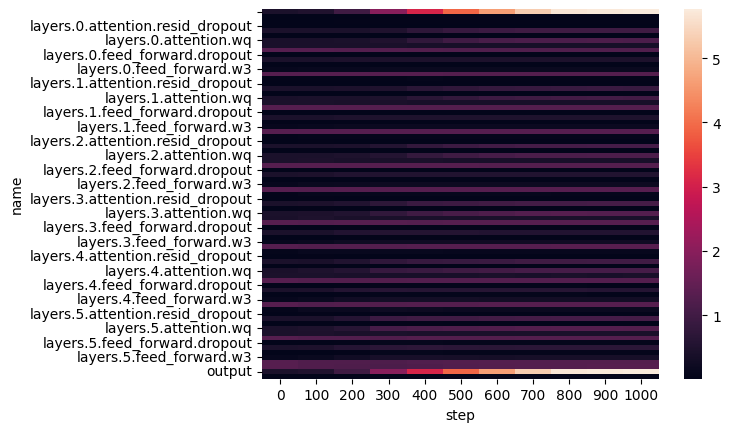

In [2]:
fig = scalar_global_heatmap(
    df,
    tt=TensorType.Activation,
    inc=100,
    scalar_metric='rm4'
)

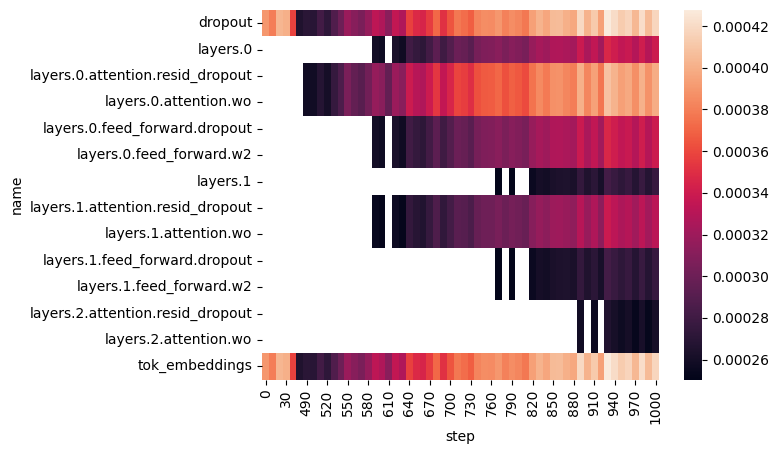

In [6]:
plt = scalar_global_heatmap(
    df.query('@df.metadata.step < 1001 and @df.general_stats.rm2 > 0.00025'),
    tt=TensorType.Gradient,
    inc=10,
    scalar_metric='rm2'
)

In [49]:
df = read_pickle('../test-data/numerics_df_v2.pkl')

In [54]:
df[('metadata','dtype')] = 'float8_e4m3fn'

In [5]:
df2 = df.metadata

In [8]:
import seaborn as sns
import pandas as pd

In [60]:
import torch, ml_dtypes

In [17]:
torch.finfo(torch.float8_e4m3fn)

finfo(resolution=1, min=-448, max=448, eps=0.125, smallest_normal=0.015625, tiny=0.015625, dtype=float8_e4m3fn)

In [18]:
type(torch.float16)

torch.dtype

In [35]:
df = pd.DataFrame({
    'dtype' : [torch.float8_e4m3fn if i%2 == 0 else torch.float8_e4m3fnuz for i in range(10)]
})

In [36]:
df.to_pickle('../test-data/dtypetest.pkl')

In [38]:
# for custom classes in pd.series, get unique classes, get the type of those, then get the set.
# Should be a single class
set([type(a) for a in df['dtype'].unique()])

{torch.dtype}

In [64]:
Tdf = df.query('@df.metadata.name == "layers.0.attention.wq" & @df.metadata.step == 0 & @df.metadata.grad == "Activation"')

1032192

In [20]:
import numpy as np

In [57]:
# Need to figure out how to 
def exp_count_to_array(df):
    Tdf = df.exponent_count.T
    bins = Tdf.index.to_numpy()
    counts = Tdf[Tdf.columns.item()].to_numpy()
    hist = np.array([bins,counts])

    print(hist)
    return np.concatenate([[2**hist[0][i]]*int(hist[1][i]) for i in range(len(hist[0]))])


In [78]:
df

metadata                                     \
                           name                               type   
0                tok_embeddings  torch.nn.modules.sparse.Embedding   
1                       dropout   torch.nn.modules.dropout.Dropout   
2       layers.0.attention_norm                      model.RMSNorm   
3         layers.0.attention.wq     torch.nn.modules.linear.Linear   
4         layers.0.attention.wk     torch.nn.modules.linear.Linear   
...                         ...                                ...   
153148    layers.0.attention.wk     torch.nn.modules.linear.Linear   
153149    layers.0.attention.wq     torch.nn.modules.linear.Linear   
153150  layers.0.attention_norm                      model.RMSNorm   
153151                  dropout   torch.nn.modules.dropout.Dropout   
153152           tok_embeddings  torch.nn.modules.sparse.Embedding   

                                    general_stats                          \
                         grad  step          mean       std      mean_abs   
0       TensorType.Activation     0 -4.262986e-05  0.020015  1.599783e-02   
1       TensorType.Activation     0 -4.262986e-05  0.020015  1.599783e-02   
2       TensorType.Activation     0 -1.977458e-03  0.987685  7.899441e-01   
3       TensorType.Activation     0  2.296686e-03  0.315497  2.528414e-01   
4       TensorType.Activation     0 -2.830928e-03  0.314933  2.510965e-01   
...                       ...   ...           ...       ...           ...   
153148    TensorType.Gradient  1000 -8.898307e-11  0.000003  1.231984e-06   
153149    TensorType.Gradient  1000 -1.028476e-09  0.000002  7.743534e-07   
153150    TensorType.Gradient  1000  1.421885e-09  0.000004  2.441213e-06   
153151    TensorType.Gradient  1000  9.915611e-07  0.000418  2.780741e-04   
153152    TensorType.Gradient  1000  9.915611e-07  0.000418  2.780741e-04   

                                          ... exponent_count                  \
         max_abs       min_abs       rm2  ...             10  11  12  13  14   
0       0.102079  1.826123e-08  0.020015  ...              0   0   0   0   0   
1       0.102079  1.826123e-08  0.020015  ...              0   0   0   0   0   
2       5.083467  8.873100e-07  0.987686  ...              0   0   0   0   0   
3       1.435886  6.053597e-08  0.315506  ...              0   0   0   0   0   
4       1.456772  6.128103e-07  0.314945  ...              0   0   0   0   0   
...          ...           ...       ...  ...            ...  ..  ..  ..  ..   
153148  0.000131  4.236195e-13  0.000003  ...              0   0   0   0   0   
153149  0.000083  0.000000e+00  0.000002  ...              0   0   0   0   0   
153150  0.000095  3.126388e-12  0.000004  ...              0   0   0   0   0   
153151  0.006545  2.128218e-10  0.000418  ...              0   0   0   0   0   
153152  0.006545  2.128218e-10  0.000418  ...              0   0   0   0   0   

                                   metadata  
        15  16     -inf  inf          dtype  
0        0   0      418    0  float8_e4m3fn  
1        0   0      418    0  float8_e4m3fn  
2        0   0       34    0  float8_e4m3fn  
3        0   0       14    0  float8_e4m3fn  
4        0   0       12    0  float8_e4m3fn  
...     ..  ..      ...  ...            ...  
153148   0   0  1012634    0  float8_e4m3fn  
153149   0   0  1018450    0  float8_e4m3fn  
153150   0   0   980333    0  float8_e4m3fn  
153151   0   0    29706    0  float8_e4m3fn  
153152   0   0    29706    0  float8_e4m3fn  

[153153 rows x 48 columns]

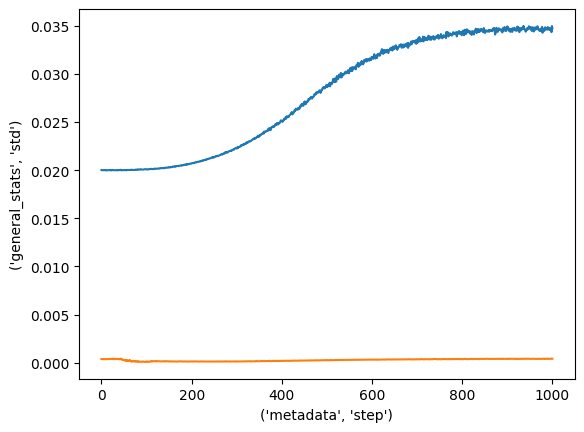

In [101]:


fig = sns.lineplot(df.query("@df.metadata.name == 'tok_embeddings' & @df.metadata.grad == 'Activation'"), x=('metadata','step'), y=('general_stats','std'))



# fig = sns.lineplot(df.query("@df.metadata.name == 'tok_embeddings' & @df.metadata.grad == 'Gradient'"), x=('metadata','step'), y=('general_stats','std'))

In [102]:
num_rows = 20
years = list(range(1990, 1990 + num_rows))
data_preproc = pd.DataFrame({
    'Year': years, 
    'A': np.random.randn(num_rows).cumsum(),
    'B': np.random.randn(num_rows).cumsum(),
    'C': np.random.randn(num_rows).cumsum(),
    'D': np.random.randn(num_rows).cumsum()})

# Convert the dataframe from wide to long format 
dfl = pd.melt(data_preproc, ['Year'])

In [104]:
data_preproc

,Year,A,B,C,D
0,1990,1.204371,-0.675873,0.476525,0.042676
1,1991,1.899086,-0.738210,0.638004,0.558030
2,1992,-0.855301,0.473674,-0.051625,0.892399
3,1993,0.677837,-0.515340,-0.681541,1.795032
4,1994,1.691905,-1.536767,-1.264053,3.677440
5,1995,1.401880,-1.796672,-2.335804,1.992446
6,1996,2.025013,-1.781105,-3.913357,1.858021
7,1997,0.876238,-0.277429,-3.466831,1.732574
8,1998,2.779872,-2.011277,-2.647884,2.755840
9,1999,1.546451,-1.163273,-4.457069,2.819423


In [82]:
df.query("@df.metadata.name == 'tok_embeddings'")

metadata                                     \
                  name                               type   
0       tok_embeddings  torch.nn.modules.sparse.Embedding   
152     tok_embeddings  torch.nn.modules.sparse.Embedding   
153     tok_embeddings  torch.nn.modules.sparse.Embedding   
305     tok_embeddings  torch.nn.modules.sparse.Embedding   
306     tok_embeddings  torch.nn.modules.sparse.Embedding   
...                ...                                ...   
152846  tok_embeddings  torch.nn.modules.sparse.Embedding   
152847  tok_embeddings  torch.nn.modules.sparse.Embedding   
152999  tok_embeddings  torch.nn.modules.sparse.Embedding   
153000  tok_embeddings  torch.nn.modules.sparse.Embedding   
153152  tok_embeddings  torch.nn.modules.sparse.Embedding   

                                    general_stats                      \
                         grad  step          mean       std  mean_abs   
0       TensorType.Activation     0 -4.262986e-05  0.020015  0.015998   
152       TensorType.Gradient     0  4.746645e-06  0.000390  0.000205   
153     TensorType.Activation     1 -4.882830e-05  0.019995  0.015997   
305       TensorType.Gradient     1  4.974250e-06  0.000380  0.000201   
306     TensorType.Activation     2 -7.579075e-05  0.019985  0.015971   
...                       ...   ...           ...       ...       ...   
152846    TensorType.Gradient   998  6.427852e-07  0.000423  0.000285   
152847  TensorType.Activation   999 -2.984029e-04  0.034958  0.028749   
152999    TensorType.Gradient   999  4.605094e-07  0.000409  0.000273   
153000  TensorType.Activation  1000 -2.796618e-04  0.034735  0.028517   
153152    TensorType.Gradient  1000  9.915611e-07  0.000418  0.000278   

                                          ... exponent_count                  \
         max_abs       min_abs       rm2  ...             10  11  12  13  14   
0       0.102079  1.826123e-08  0.020015  ...              0   0   0   0   0   
152     0.010546  1.909939e-11  0.000390  ...              0   0   0   0   0   
153     0.102079  1.826123e-08  0.019995  ...              0   0   0   0   0   
305     0.013233  2.146407e-10  0.000380  ...              0   0   0   0   0   
306     0.102080  2.084425e-08  0.019986  ...              0   0   0   0   0   
...          ...           ...       ...  ...            ...  ..  ..  ..  ..   
152846  0.005768  4.692993e-10  0.000423  ...              0   0   0   0   0   
152847  0.121845  9.917158e-08  0.034959  ...              0   0   0   0   0   
152999  0.005583  4.365575e-11  0.000409  ...              0   0   0   0   0   
153000  0.124500  9.941733e-08  0.034736  ...              0   0   0   0   0   
153152  0.006545  2.128218e-10  0.000418  ...              0   0   0   0   0   

                                 metadata  
        15  16   -inf  inf          dtype  
0        0   0    418    0  float8_e4m3fn  
152      0   0  32876    0  float8_e4m3fn  
153      0   0    400    0  float8_e4m3fn  
305      0   0  33425    0  float8_e4m3fn  
306      0   0    438    0  float8_e4m3fn  
...     ..  ..    ...  ...            ...  
152846   0   0  28399    0  float8_e4m3fn  
152847   0   0    113    0  float8_e4m3fn  
152999   0   0  31033    0  float8_e4m3fn  
153000   0   0    116    0  float8_e4m3fn  
153152   0   0  29706    0  float8_e4m3fn  

[2002 rows x 48 columns]